<a href="https://colab.research.google.com/github/julyanks/fake_profile_detection/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  **Spammer Detection and fake user authentication by identifying fake profiles(using dataset of twitter)**

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
GU = pd.read_csv('/content/drive/MyDrive/users.csv')
FU = pd.read_csv('/content/drive/MyDrive/fusers.csv')

In [3]:
GU=GU.fillna(0)
FU=FU.fillna(0)
print(GU[['name','default_profile']])
print(FU[['name','default_profile']])

                  name  default_profile
0     Davide Dellacasa              0.0
1       Simone Economo              0.0
2               tacone              0.0
3             alesaura              0.0
4               Angelo              0.0
...                ...              ...
1476  Frilaif Official              1.0
1477   ♔♥HeartsQueen♥♔              0.0
1478     angelagervasi              1.0
1479          Midnight              0.0
1480               ʸᵒᵘ              0.0

[1481 rows x 2 columns]
                    name  default_profile
0           pirfectmoses              0.0
1               SAK Nair              1.0
2                 Deepak              0.0
3        Marcos Vinicius              0.0
4     Shri Kant Kanaujia              1.0
...                  ...              ...
1332         Verda Marks              1.0
1333     Danial Campbell              1.0
1334        Maudie Meyer              1.0
1335     Harriett Harvey              1.0
1336     Gillian Wheeler         

In [5]:
print("Reading dataset")
print(FU.columns)                  
print(GU.describe())               
print(FU.describe())               
x=pd.concat([GU,FU]) 
y=len(FU)*[0] + len(GU)*[1]
df=x


Reading dataset
Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset'],
      dtype='object')
                 id  statuses_count  followers_count  friends_count  \
count  1.481000e+03     1481.000000      1481.000000    1481.000000   
mean   4.000432e+08     3140.782579       690.922350     403.128292   
std    2.961304e+08     6391.9

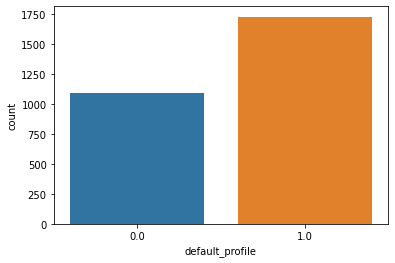

In [6]:
import seaborn as sns
sns.countplot(x="default_profile",data=df)
plt.show()

In [7]:
extract = ['statuses_count','followers_count','friends_count','favourites_count','listed_count']
x=x.loc[:,extract]                
print(x.columns)
print(x.describe())

Index(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count'],
      dtype='object')
       statuses_count  followers_count  friends_count  favourites_count  \
count     2818.000000      2818.000000    2818.000000       2818.000000   
mean      1672.198368       371.105039     395.363023        234.541164   
std       4884.669157      8022.631339     465.694322       1445.847248   
min          0.000000         0.000000       0.000000          0.000000   
25%         35.000000        17.000000     168.000000          0.000000   
50%         77.000000        26.000000     306.000000          0.000000   
75%       1087.750000       111.000000     519.000000         37.000000   
max      79876.000000    408372.000000   12773.000000      44349.000000   

       listed_count  
count   2818.000000  
mean       2.818666  
std       23.480430  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max      744.000000  

In [8]:
from sklearn.model_selection import  train_test_split
print(" Splitting the dataset in TRAINING and TESTING")
x1, x2, y1, y2 = train_test_split(x ,y ,test_size=0.20,random_state=44)
print(x1.shape)
print(x2.shape)
y1=np.asarray(y1)
y2=np.asarray(y2)
print(y1.shape)
print(y2.shape)
   

 Splitting the dataset in TRAINING and TESTING
(2254, 5)
(564, 5)
(2254,)
(564,)


In [9]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=30)  
classifier.fit(x1, y1) 
pred=classifier.predict(x2)
print("Training accuracy : ",classifier.score(x1 , y1))
print("\n Testing accuracy : ",classifier.score(x2 , y2)) 

Training accuracy :  0.8123336291038155

 Testing accuracy :  0.8085106382978723


In [10]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y2, pred)
c=accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.85%


In [11]:
pred=pd.DataFrame(pred)
pred.shape

(564, 1)

In [12]:
import pickle

In [13]:
pickle.dump(classifier, open('project1.pkl', 'wb'))

In [14]:
project1 = pickle.load(open('project1.pkl', 'rb'))

In [15]:
result=project1.predict([[120,500,250,0,0]])
if(result==[0]):
  print("Profile is REAL")
else:
  print("Profile is FAKE")

Profile is REAL


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
